In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Plot sentiment distribution (use seaborn or matplotlib for visualization)
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipelines
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KRISHNAVENI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KRISHNAVENI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KRISHNAVENI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df=pd.read_csv("Recipe Reviews and User Feedback Dataset.csv")

In [3]:
df.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [4]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import pandas as pd

# Initialize lemmatizer, stemmer, and stopwords
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Preprocessing function for text column
def preprocess_text(text):
    # Check if the text is a string
    if isinstance(text, str):
        # 1. Remove HTML tags
        text = re.sub(r'<.*?>', '', text)  # removes HTML tags

        # 2. Convert text to lowercase
        text = text.lower()

        # 3. Remove punctuation and numbers
        text = re.sub(r'[^a-z\s]', '', text)

        # 4. Tokenize text (split into words)
        tokens = word_tokenize(text)

        # 5. Remove stopwords
        tokens = [word for word in tokens if word not in stop_words]

        # 6. Lemmatization (converting words to their base form) and Stemming
        tokens = [lemmatizer.lemmatize(stemmer.stem(word)) for word in tokens]

        # 7. Rebuild the sentence from tokens
        return ' '.join(tokens)
    else:
        # If the text is not a string, return an empty string or NaN
        return ''

# Assuming your DataFrame is named df and has a 'text' column
# Apply preprocessing to the 'text' column and create a new 'cleaned_text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Show the cleaned data
print(df[['text', 'cleaned_text']].head())


                                                text  \
0  I tweaked it a little, removed onions because ...   
1  Bush used to have a white chili bean and it ma...   
2  I have a very complicated white chicken chili ...   
3  In your introduction, you mentioned cream chee...   
4  Wonderful! I made this for a &#34;Chili/Stew&#...   

                                        cleaned_text  
0  tweak littl remov onion onion hater hous use i...  
1  bush use white chili bean made recip super sim...  
2  complic white chicken chili recip made year ev...  
3    introduct mention cream chees none list ingredi  
4  wonder made chilistew night dinner church ever...  


In [5]:
# Create the sentiment column based on stars
def map_stars_to_sentiment(stars):
    if stars >= 4:
        return 'positive'
    elif stars == 3:
        return 'neutral'
    else:
        return 'negative'

df['stars_sentiment'] = df['stars'].apply(map_stars_to_sentiment)


In [6]:
# Initialize the SentimentIntensityAnalyzer (VADER)
sia = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis on the cleaned_text column
df['vader_sentiment_score'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment as positive, negative, or neutral
df['vader_sentiment_label'] = df['vader_sentiment_score'].apply(
    lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral')
)


In [7]:
df.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,cleaned_text,stars_sentiment,vader_sentiment_score,vader_sentiment_label
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ...",tweak littl remov onion onion hater hous use i...,positive,0.5994,positive
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...,bush use white chili bean made recip super sim...,positive,0.5994,positive
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...,complic white chicken chili recip made year ev...,positive,0.7650,positive
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee...",introduct mention cream chees none list ingredi,negative,0.0000,neutral
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,wonder made chilistew night dinner church ever...,negative,0.0772,positive


In [8]:
from collections import Counter
import pandas as pd

# Replace 'text' and 'vader_sentiment_label' with your actual column names
df['cleaned_text'] = df['cleaned_text'].fillna('').astype(str)  # Fill NaN with empty strings and convert all to strings

# Filter text based on sentiment
positive_texts = " ".join(df[df['vader_sentiment_label'] == 'positive']['cleaned_text'].tolist())
neutral_texts = " ".join(df[df['vader_sentiment_label'] == 'neutral']['cleaned_text'].tolist())
negative_texts = " ".join(df[df['vader_sentiment_label'] == 'negative']['cleaned_text'].tolist())

# Function to count most common words
def get_most_common_words(text, num_words=10):
    # Tokenize words
    words = text.split()
    # Count word frequencies
    word_counts = Counter(words)
    # Return the most common words
    return word_counts.most_common(num_words)

# Get most common words for each sentiment
positive_words = get_most_common_words(positive_texts, num_words=10)
neutral_words = get_most_common_words(neutral_texts, num_words=10)
negative_words = get_most_common_words(negative_texts, num_words=10)

# Display results
print("Most Common Positive Words:", positive_words)
print("Most Common Neutral Words:", neutral_words)
print("Most Common Negative Words:", negative_words)


Most Common Positive Words: [('recip', 9031), ('make', 6771), ('use', 6506), ('made', 5203), ('love', 4929), ('good', 3561), ('time', 3518), ('great', 2923), ('ad', 2874), ('like', 2825)]
Most Common Neutral Words: [('make', 873), ('recip', 806), ('delici', 686), ('use', 633), ('made', 564), ('easi', 436), ('ad', 293), ('favorit', 269), ('time', 267), ('one', 255)]
Most Common Negative Words: [('recip', 516), ('use', 402), ('make', 379), ('made', 291), ('time', 234), ('like', 195), ('cut', 180), ('didnt', 179), ('delici', 165), ('ad', 152)]


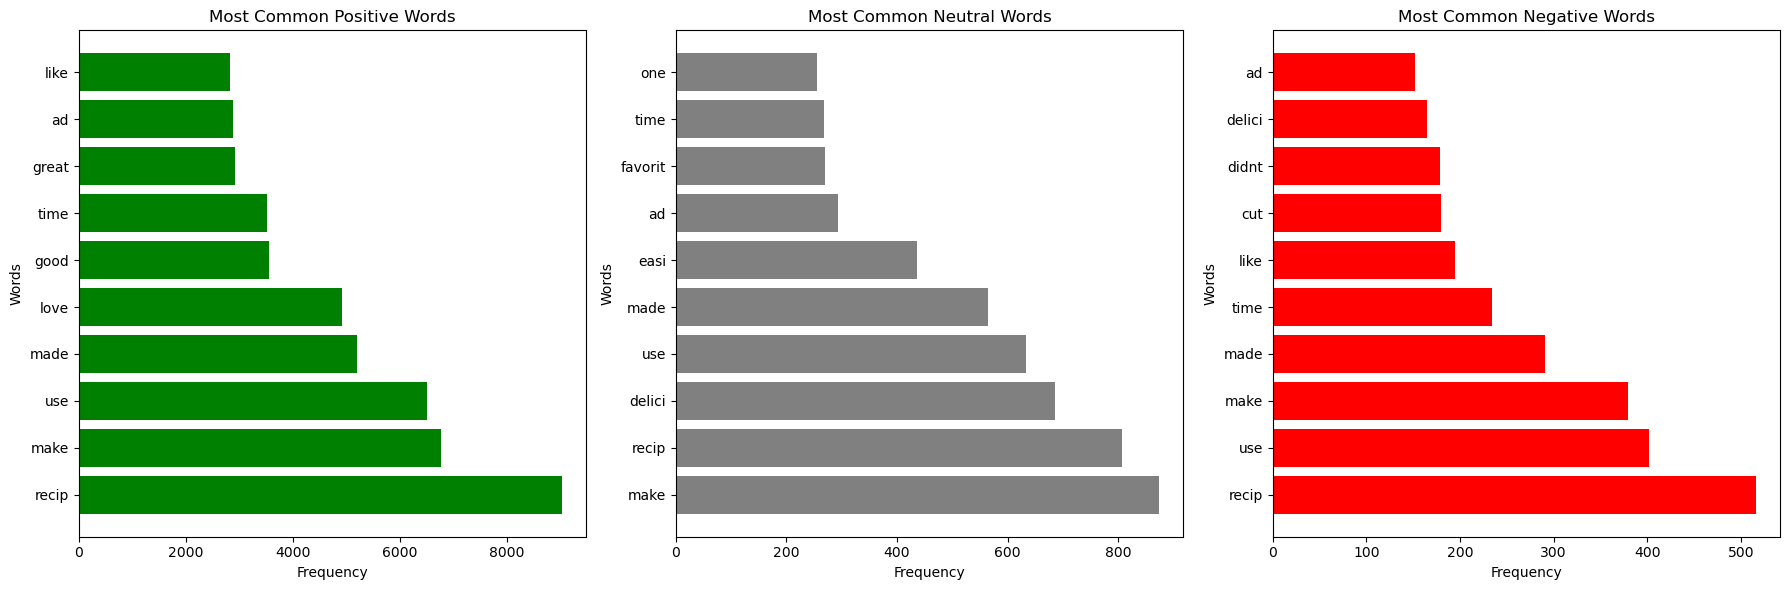

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

# Function to count most common words
def get_most_common_words(text, num_words=10):
    words = text.split()
    word_counts = Counter(words)
    return word_counts.most_common(num_words)

# Get the most common words for each sentiment
positive_words = get_most_common_words(positive_texts, num_words=10)
neutral_words = get_most_common_words(neutral_texts, num_words=10)
negative_words = get_most_common_words(negative_texts, num_words=10)

# Prepare data for plotting
positive_words_df = pd.DataFrame(positive_words, columns=['word', 'count'])
neutral_words_df = pd.DataFrame(neutral_words, columns=['word', 'count'])
negative_words_df = pd.DataFrame(negative_words, columns=['word', 'count'])

# Plotting the bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Positive Sentiment
axes[0].barh(positive_words_df['word'], positive_words_df['count'], color='green')
axes[0].set_title('Most Common Positive Words')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Words')

# Neutral Sentiment
axes[1].barh(neutral_words_df['word'], neutral_words_df['count'], color='gray')
axes[1].set_title('Most Common Neutral Words')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Words')

# Negative Sentiment
axes[2].barh(negative_words_df['word'], negative_words_df['count'], color='red')
axes[2].set_title('Most Common Negative Words')
axes[2].set_xlabel('Frequency')
axes[2].set_ylabel('Words')

# Show the plot
plt.tight_layout()
plt.show()


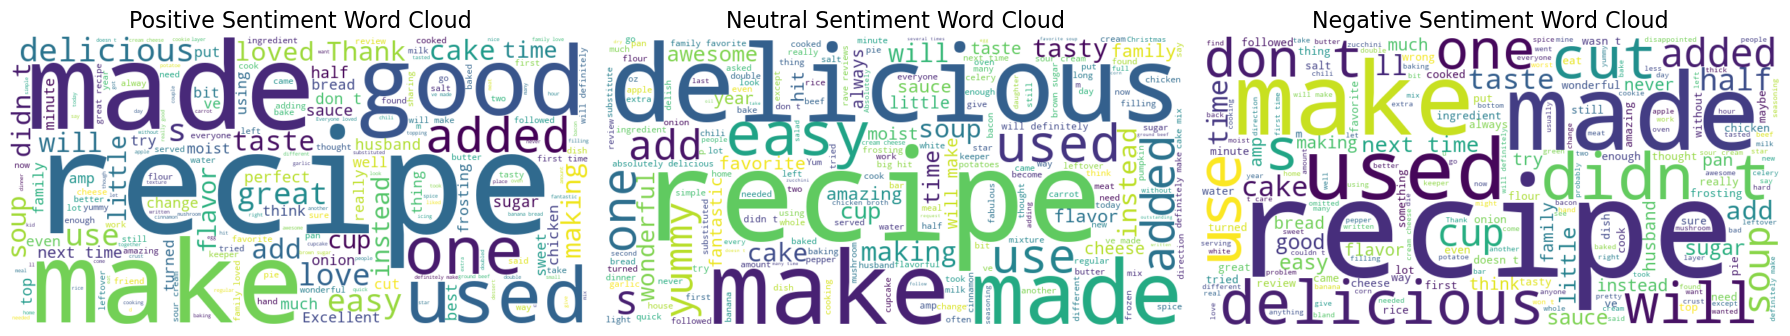

In [10]:
# Filter the data based on sentiment and ensure all reviews are strings
positive_reviews = df[df['vader_sentiment_label'] == 'positive']['text'].dropna().astype(str)
neutral_reviews = df[df['vader_sentiment_label'] == 'neutral']['text'].dropna().astype(str)
negative_reviews = df[df['vader_sentiment_label'] == 'negative']['text'].dropna().astype(str)

# Generate word clouds for each sentiment category
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(neutral_reviews))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

# Plot word clouds
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud', fontsize=16)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud', fontsize=16)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


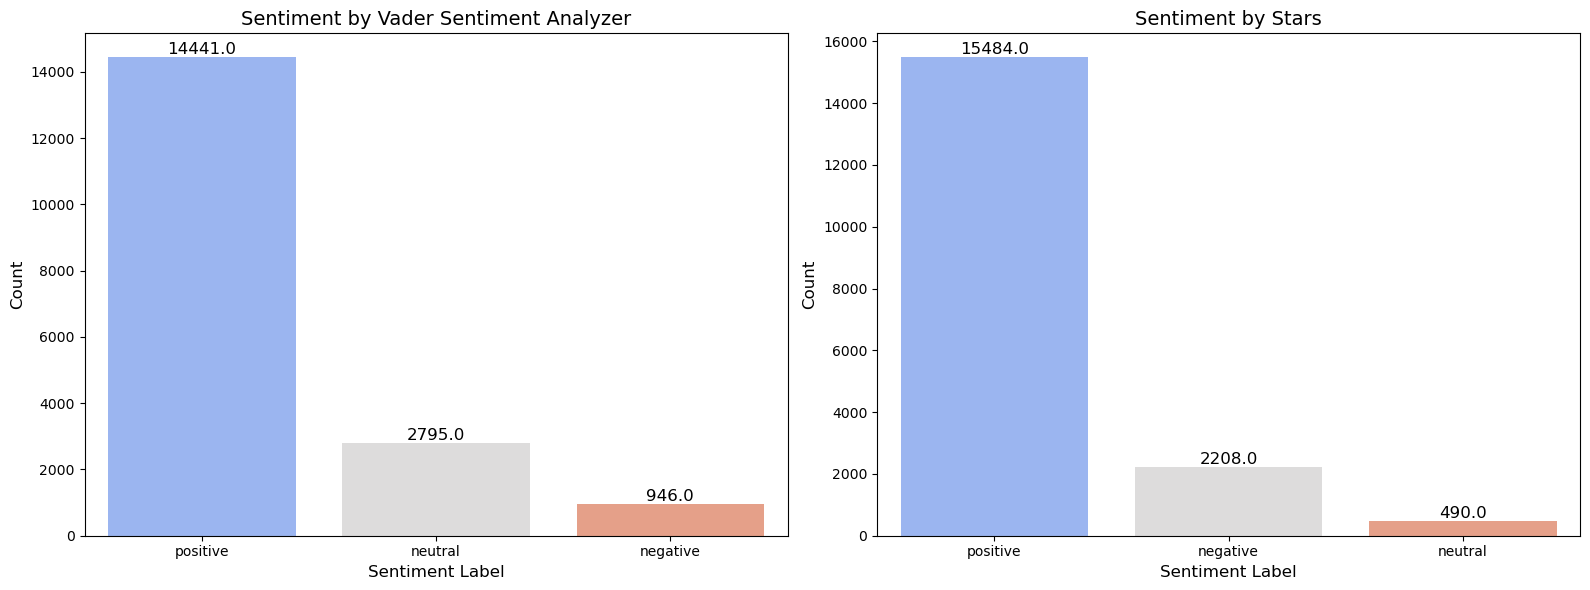

In [11]:
# Set up the figure and axis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot the distribution of sentiment labels using VADER sentiment
sns.countplot(x='vader_sentiment_label', data=df, palette='coolwarm', ax=axes[0])
axes[0].set_title('Sentiment by Vader Sentiment Analyzer', fontsize=14)
axes[0].set_xlabel('Sentiment Label', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Adding count on top of bars for VADER sentiment
for p in axes[0].patches:
    height = p.get_height()
    if height > 0:  # Only add text if the bar has a positive height
        axes[0].text(p.get_x() + p.get_width() / 2., height, f'{height}', 
                     ha='center', va='bottom', fontsize=12, color='black')

# Plot the distribution of sentiment labels using stars
sns.countplot(x='stars_sentiment', data=df, palette='coolwarm', ax=axes[1])
axes[1].set_title('Sentiment by Stars', fontsize=14)
axes[1].set_xlabel('Sentiment Label', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

# Adding count on top of bars for Stars sentiment
for p in axes[1].patches: 
    height = p.get_height()
    if height > 0:  # Only add text if the bar has a positive height
        axes[1].text(p.get_x() + p.get_width() / 2., height, f'{height}', 
                     ha='center', va='bottom', fontsize=12, color='black')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


[[12609  2247   628]
 [  370    53    67]
 [ 1462   495   251]]


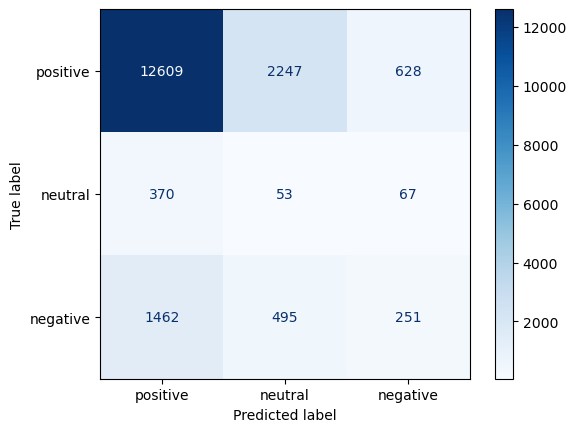

In [12]:
# Compute the confusion matrix
labels = ['positive', 'neutral', 'negative']
cm = confusion_matrix(df['stars_sentiment'], df['vader_sentiment_label'], labels=labels)
print(cm)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')


In [13]:
# Calculate accuracy from the confusion matrix
correct_predictions = cm[0][0] + cm[1][1] + cm[2][2]
total_predictions = cm.sum()

accuracy = correct_predictions / total_predictions

# Display the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 71.02%


In [14]:
df.columns

Index(['Unnamed: 0', 'recipe_number', 'recipe_code', 'recipe_name',
       'comment_id', 'user_id', 'user_name', 'user_reputation', 'created_at',
       'reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score',
       'text', 'cleaned_text', 'stars_sentiment', 'vader_sentiment_score',
       'vader_sentiment_label'],
      dtype='object')

In [15]:
df.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,cleaned_text,stars_sentiment,vader_sentiment_score,vader_sentiment_label
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ...",tweak littl remov onion onion hater hous use i...,positive,0.5994,positive
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...,bush use white chili bean made recip super sim...,positive,0.5994,positive
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...,complic white chicken chili recip made year ev...,positive,0.7650,positive
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee...",introduct mention cream chees none list ingredi,negative,0.0000,neutral
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,wonder made chilistew night dinner church ever...,negative,0.0772,positive


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Select features and target
features = ['reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score']
target = 'vader_sentiment_label'

# Prepare the feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Encode target labels (if necessary)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define multiple classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\n=== {name} ===")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))



=== Random Forest ===
Accuracy: 0.7896618091833929
Confusion Matrix:
 [[   4    2  183]
 [   3    3  553]
 [   9   15 2865]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.25      0.02      0.04       189
     neutral       0.15      0.01      0.01       559
    positive       0.80      0.99      0.88      2889

    accuracy                           0.79      3637
   macro avg       0.40      0.34      0.31      3637
weighted avg       0.67      0.79      0.70      3637


=== Logistic Regression ===
Accuracy: 0.7946109430849602
Confusion Matrix:
 [[   1    0  188]
 [   0    0  559]
 [   0    0 2889]]
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.01      0.01       189
     neutral       0.00      0.00      0.00       559
    positive       0.79      1.00      0.89      2889

    accuracy                           0.79      3637
   macro avg       0.60      0.34      0.